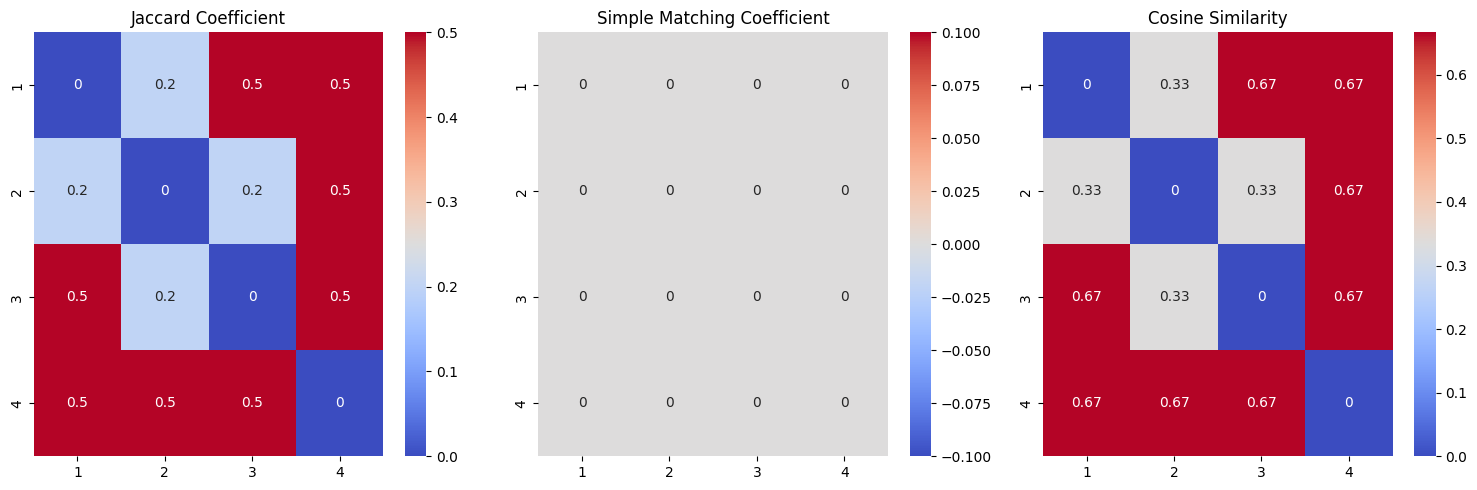

In [1]:
# A10. Cosine Similarity Measure
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity


data = [
    [1, 0, 1, 0, 1],
    [0, 1, 1, 1, 0],
    [1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1],

]


vectors = data[:20]


num_vectors = len(vectors)
jc_matrix = np.zeros((num_vectors, num_vectors))
smc_matrix = np.zeros((num_vectors, num_vectors))
cos_matrix = np.zeros((num_vectors, num_vectors))


for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j:
            jc = jaccard_score(vectors[i], vectors[j])
            jc_matrix[i, j] = jc
            smc = np.mean(vectors[i] == vectors[j])
            smc_matrix[i, j] = smc
            cos = cosine_similarity([vectors[i]], [vectors[j]])[0][0]
            cos_matrix[i, j] = cos

jc_df = pd.DataFrame(jc_matrix, columns=range(1, num_vectors + 1), index=range(1, num_vectors + 1))
smc_df = pd.DataFrame(smc_matrix, columns=range(1, num_vectors + 1), index=range(1, num_vectors + 1))
cos_df = pd.DataFrame(cos_matrix, columns=range(1, num_vectors + 1), index=range(1, num_vectors + 1))


fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.heatmap(jc_df, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Jaccard Coefficient')

sns.heatmap(smc_df, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Simple Matching Coefficient')

sns.heatmap(cos_df, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Cosine Similarity')

plt.tight_layout()
plt.show()
